In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SIGNATE/【第47回_Beginner限定コンペ】医療保険の費用帯予測/train.csv", index_col = 0) # 学習用データ
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SIGNATE/【第47回_Beginner限定コンペ】医療保険の費用帯予測/test.csv", index_col=0)   # 評価用データ
sample_submit = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SIGNATE/【第47回_Beginner限定コンペ】医療保険の費用帯予測/sample_submit.csv", index_col=0, header=None) # 応募用サンプルファイル

In [ ]:
train.head()

,age,sex,bmi,children,smoker,region,charges
id,,,,,,,
0,26,male,32.665465,3,no,southeast,0
1,41,male,29.798725,1,no,southwest,0
2,28,male,32.722029,0,yes,northwest,1
3,20,female,38.429831,2,no,southeast,0
4,45,female,29.641854,1,no,northwest,0


In [ ]:
test.head()

,age,sex,bmi,children,smoker,region
id,,,,,,
13,19,male,24.365178,1,no,northeast
23,59,male,33.997763,0,yes,northeast
27,42,female,29.283450,0,no,southwest
28,30,male,24.903725,1,no,northwest
29,41,female,29.644536,0,no,southwest


In [ ]:
print(train.shape)
print(test.shape)

(1600, 7)
(400, 6)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1600 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1600 non-null   int64  
 1   sex       1600 non-null   object 
 2   bmi       1600 non-null   float64
 3   children  1600 non-null   int64  
 4   smoker    1600 non-null   object 
 5   region    1600 non-null   object 
 6   charges   1600 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 100.0+ KB


In [ ]:
train['charges'].value_counts()

charges
0    1256
1     198
2     146
Name: count, dtype: int64

In [ ]:
train.describe()

,age,bmi,children,charges
count,1600.000000,1600.000000,1600.000000,1600.000000
mean,38.985000,32.424376,1.014375,0.306250
std,13.555012,5.766915,1.259031,0.628656
min,18.000000,20.627626,0.000000,0.000000
25%,27.000000,28.634267,0.000000,0.000000
50%,40.000000,32.268786,1.000000,0.000000
75%,50.000000,37.069581,2.000000,0.000000
max,64.000000,47.290644,5.000000,2.000000


In [ ]:
train.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges       int64
dtype: object

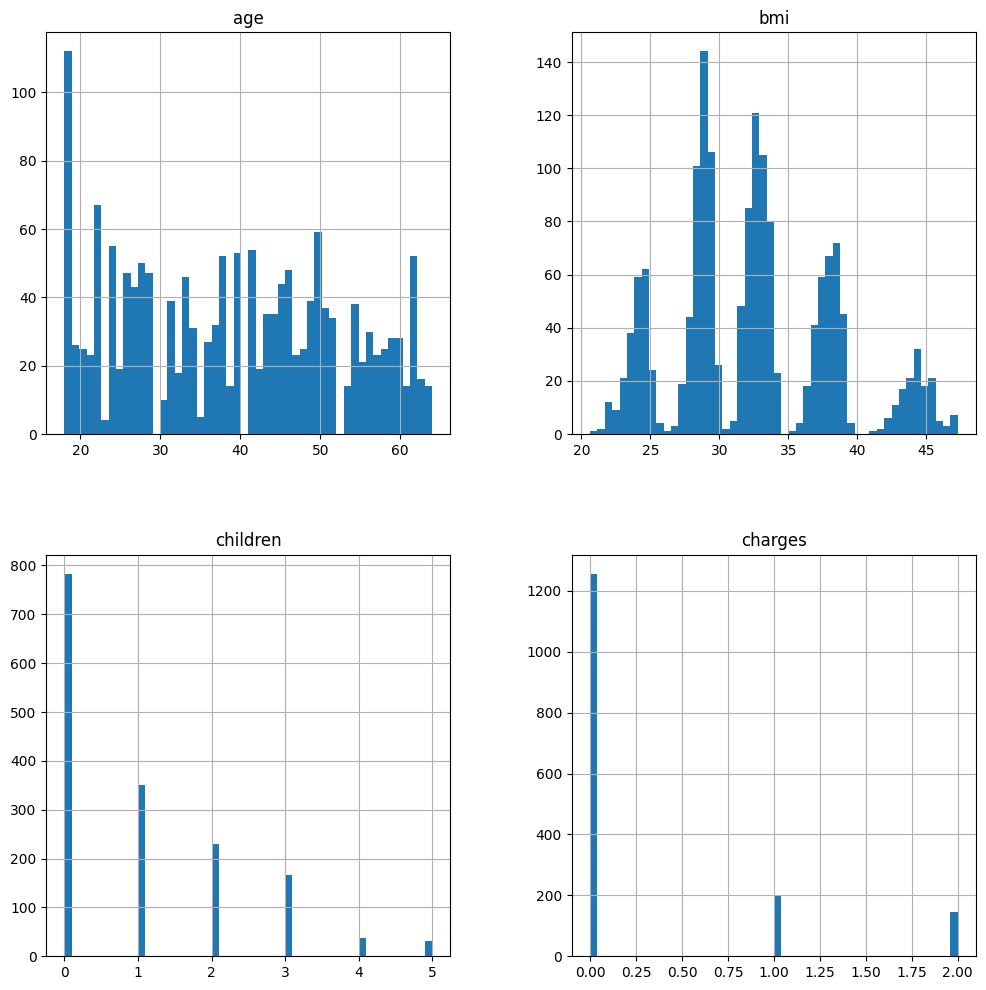

In [ ]:
train.hist(bins=50, figsize=(12,12));

In [ ]:
data = pd.concat([train, test])

data = pd.get_dummies(data, dtype=int, drop_first=True)

data.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
id,,,,,,,,,
0,26,32.665465,3,0.0,1,0,0,1,0
1,41,29.798725,1,0.0,1,0,0,0,1
2,28,32.722029,0,1.0,1,1,1,0,0
3,20,38.429831,2,0.0,0,0,0,1,0
4,45,29.641854,1,0.0,0,0,1,0,0


In [ ]:
train = data.loc[train.index]
test = data.loc[test.index]

test.head()


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
id,,,,,,,,,
13,19,24.365178,1,NaN,1,0,0,0,0
23,59,33.997763,0,NaN,1,1,0,0,0
27,42,29.283450,0,NaN,0,0,0,0,1
28,30,24.903725,1,NaN,1,0,1,0,0
29,41,29.644536,0,NaN,0,0,0,0,1


In [ ]:
test = test.drop(["charges"], axis=1)

In [ ]:
train.head()

,age,bmi,children,charges,sex_male,smoker_yes
id,,,,,,
0,26,32.665465,3,0.0,1,0
1,41,29.798725,1,0.0,1,0
2,28,32.722029,0,1.0,1,1
3,20,38.429831,2,0.0,0,0
4,45,29.641854,1,0.0,0,0


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 200x200 with 0 Axes>

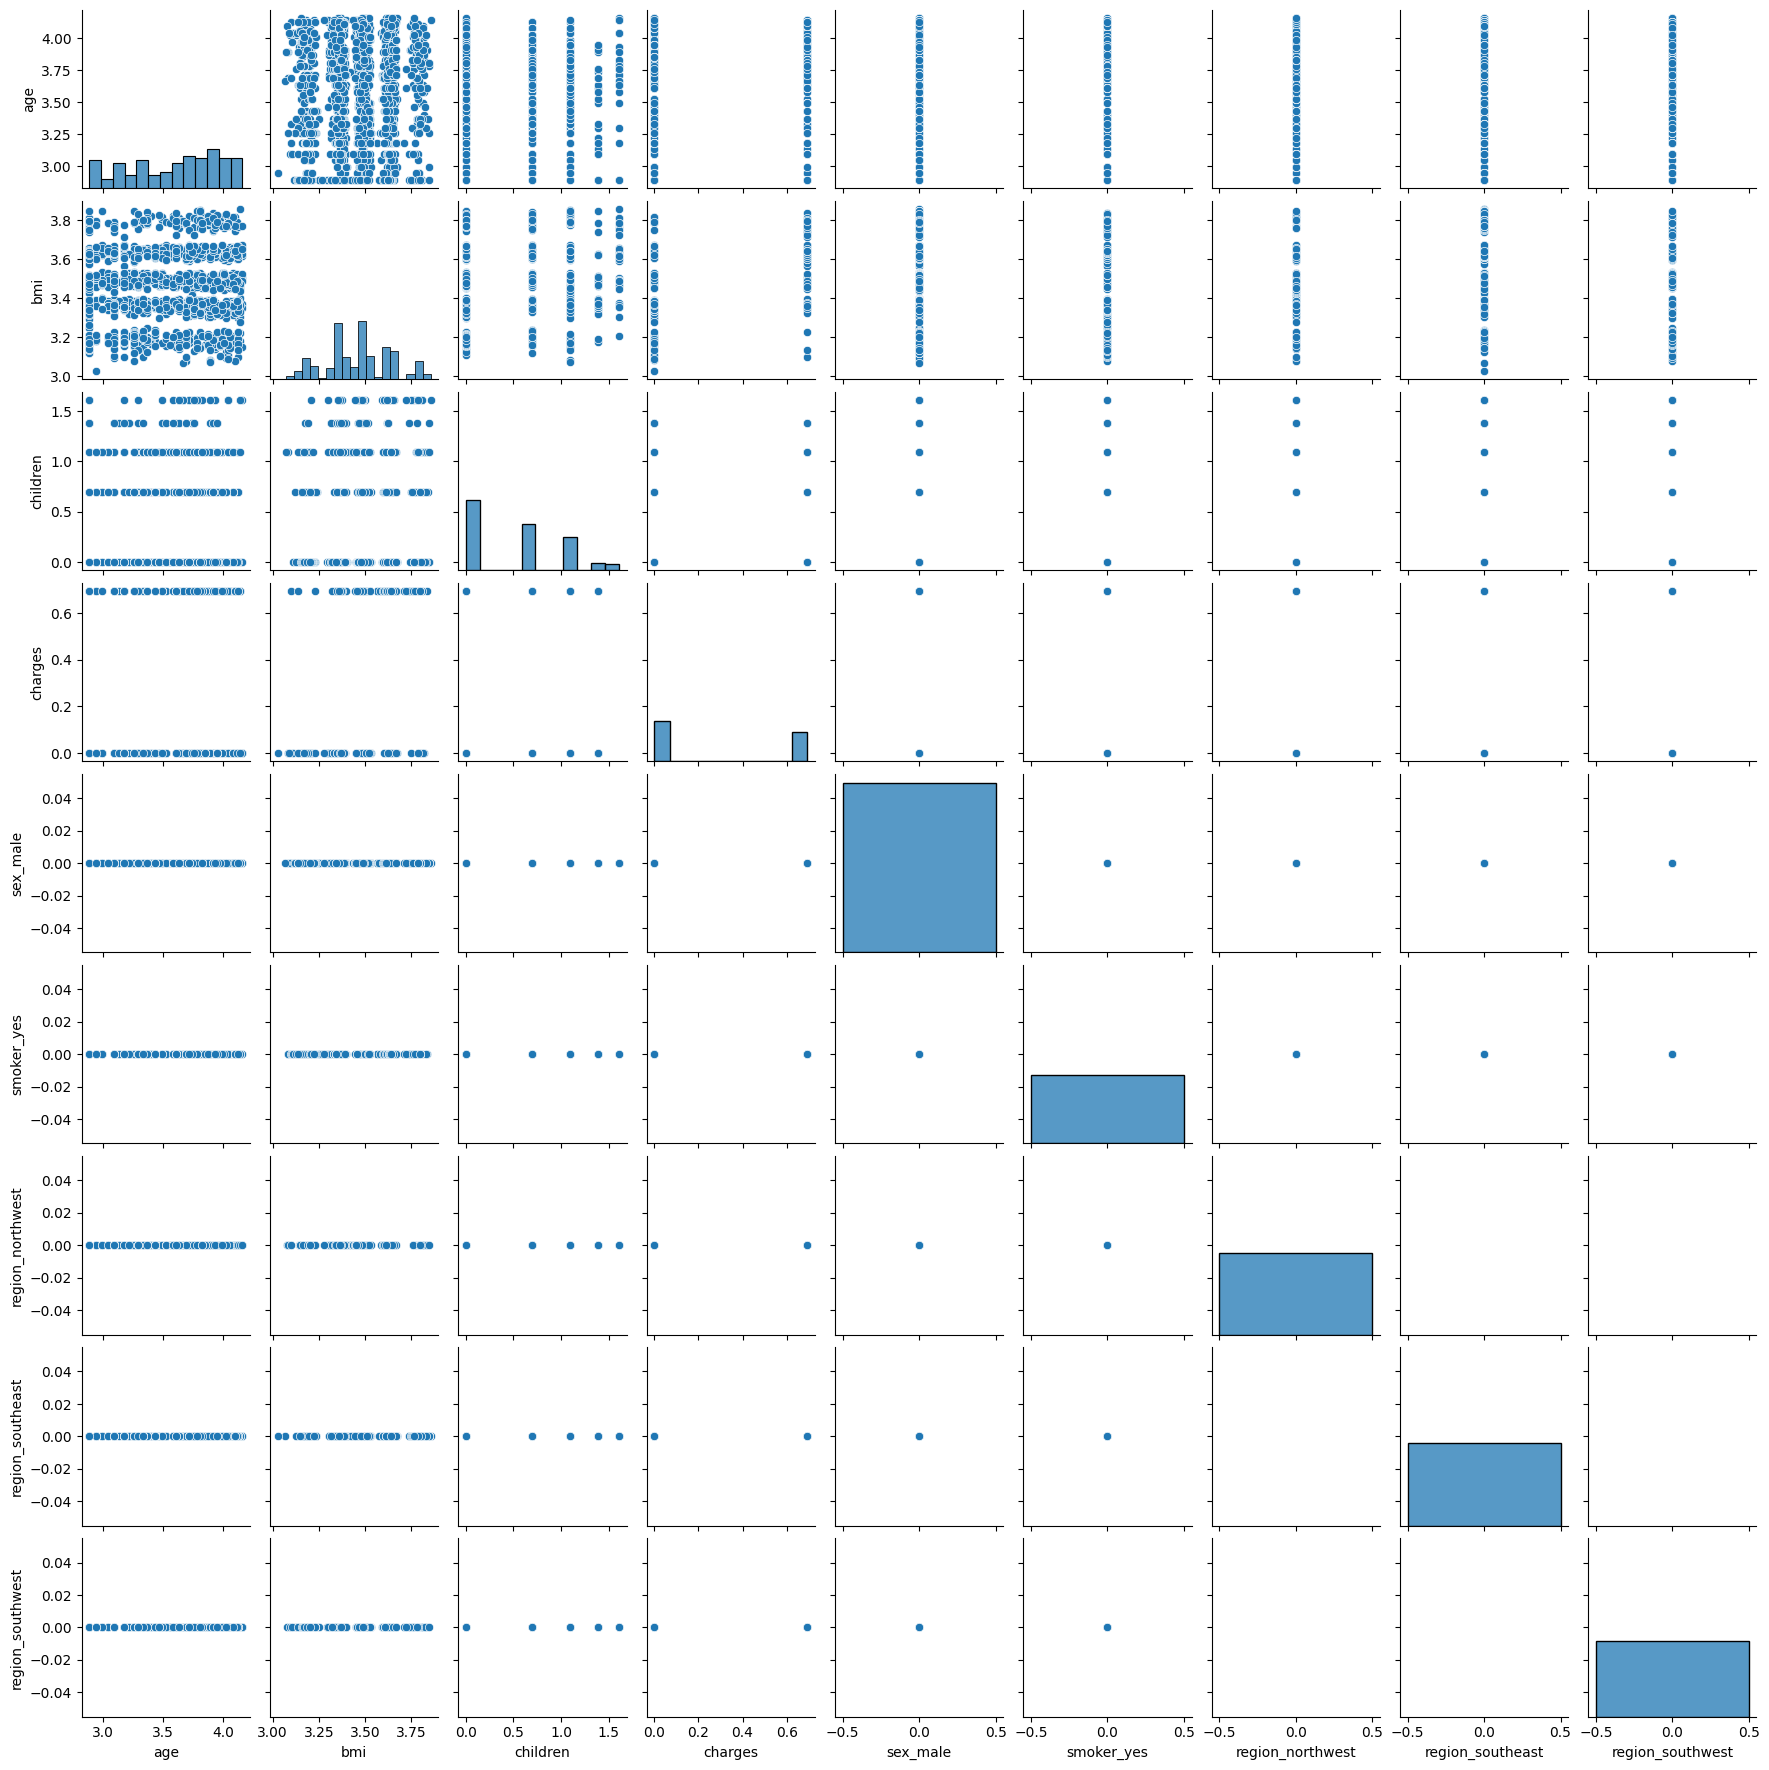

In [ ]:
# 特徴量選択
import numpy as np
import seaborn as sns
plt.figure(figsize=(2, 2)) # プロットサイズを設定
sns.pairplot(np.log(train), size=2.0) # df_pickupの変数の全ての組み合わせについて散布図を出力

<Axes: >

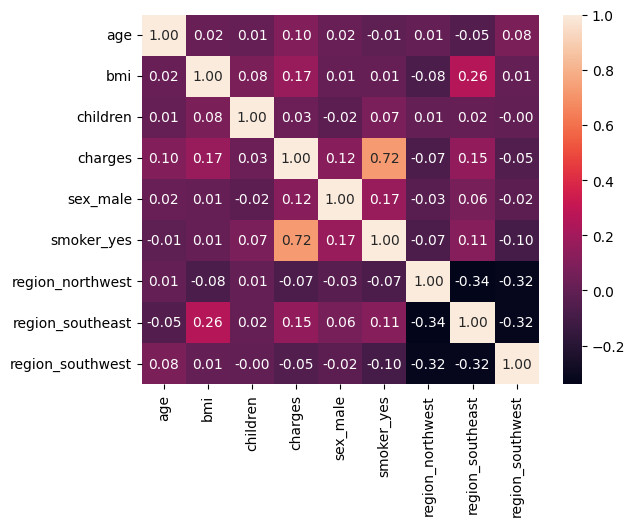

In [ ]:
sns.heatmap(train.corr(), annot=True, fmt='.2f')

In [ ]:
# train = train.drop(["region_northwest", "region_southeast", "region_southwest"], axis=1)
test = test.drop(["region_northwest", "region_southeast", "region_southwest"], axis=1)

In [ ]:
train.head(3)

,age,bmi,children,charges,sex_male,smoker_yes
id,,,,,,
0,26,32.665465,3,0.0,1,0
1,41,29.798725,1,0.0,1,0
2,28,32.722029,0,1.0,1,1


In [ ]:
test.head(3)

,age,bmi,children,sex_male,smoker_yes
id,,,,,
13,19,24.365178,1,1,0
23,59,33.997763,0,1,1
27,42,29.283450,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler

# 標準化のクラスを定義
ms = StandardScaler()

train_std = train.copy()

#fit_transformを用いて、特徴量の平均値と標準化を計算してから特徴量のスケール変換を行う
train_std[['age', 'bmi']] = ms.fit_transform(train_std[['age', 'bmi']])


In [ ]:
train_std.head()

,age,bmi,children,charges,sex_male,smoker_yes
id,,,,,,
0,-0.958248,0.041819,3,0.0,1,0
1,0.148700,-0.455438,1,0.0,1,0
2,-0.810655,0.051630,0,1.0,1,1
3,-1.401027,1.041689,2,0.0,0,0
4,0.443886,-0.482648,1,0.0,0,0


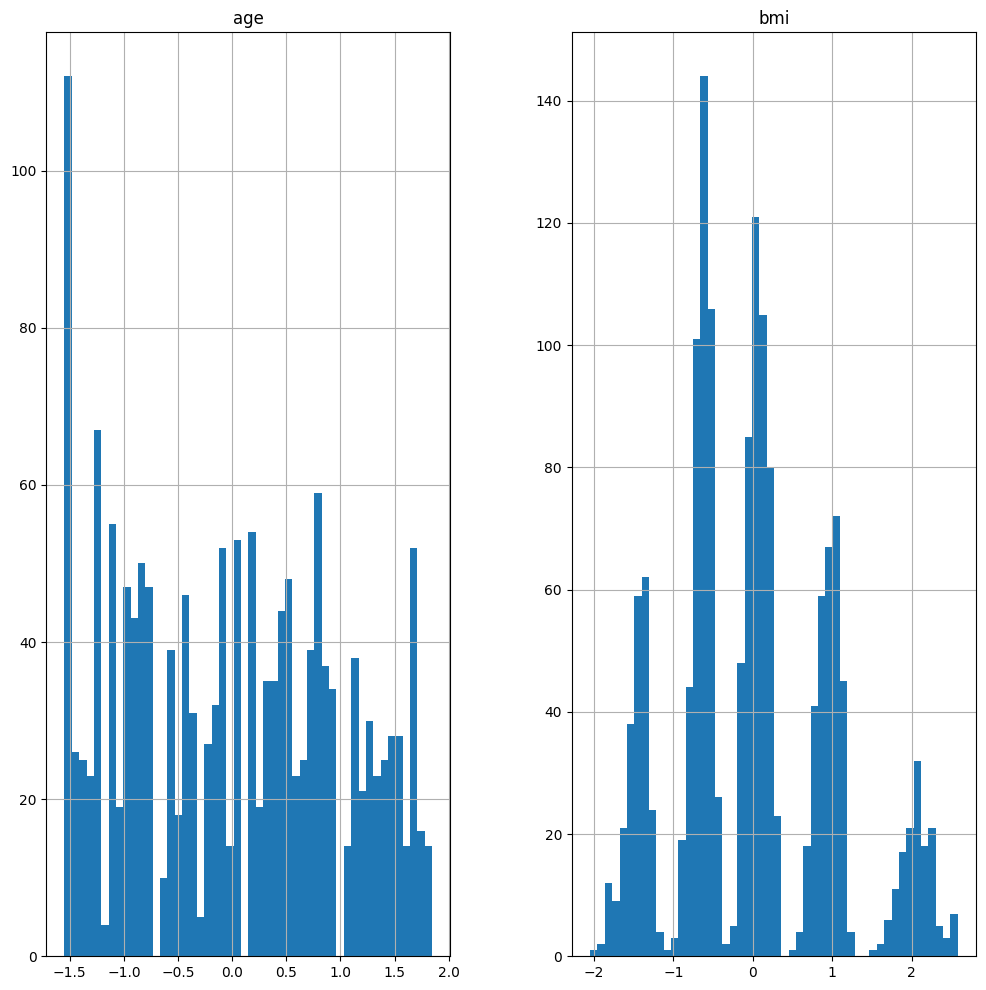

In [ ]:
train_std[['age', 'bmi']].hist(bins=50, figsize=(12,12));

In [ ]:
test_std = test.copy()

test_std[['age', 'bmi']] = ms.transform(test_std[['age', 'bmi']])

test_std.head()

,age,bmi,children,sex_male,smoker_yes
id,,,,,
13,-1.474823,-1.397926,1,1,0
23,1.477037,0.272915,0,1,1
27,0.222496,-0.544816,0,0,0
28,-0.663062,-1.304511,1,1,0
29,0.148700,-0.482183,0,0,0


In [ ]:
y = train_std["charges"] # 目的変数
X = train_std.drop(["charges"], axis=1) # 目的変数を除いたデータ

In [ ]:
X.head()

,age,bmi,children,sex_male,smoker_yes
id,,,,,
0,-0.958248,0.041819,3,1,0
1,0.148700,-0.455438,1,1,0
2,-0.810655,0.051630,0,1,1
3,-1.401027,1.041689,2,0,0
4,0.443886,-0.482648,1,0,0


In [ ]:
y.value_counts()

charges
0.0    1256
1.0     198
2.0     146
Name: count, dtype: int64

In [ ]:
# アンダーサンプリング
from imblearn.under_sampling import RandomUnderSampler ##inport部分も書いときます
zero_count = y.value_counts()[1] * 4 ##0の値を1の値の行数の何倍の行にするかのセット。ここでは4倍の数にするとしている
one_count = y.value_counts()[1]
two_count = y.value_counts()[2]
rus = RandomUnderSampler(sampling_strategy={0:zero_count, 1:one_count, 2:two_count},random_state=42, replacement=True)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [ ]:
y_resampled.value_counts()

charges
0.0    792
1.0    198
2.0    146
Name: count, dtype: int64

In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 3.4 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, random_state=42)

def objective(trial):

    # optunaでのハイパーパラメータサーチ範囲の設定
    params = {
            'criterion' : trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss']),
            'max_depth' : trial.suggest_int('max_depth', 1, 1000),
            'n_estimators' : trial.suggest_int('n_estimators', 100, 1000),
            'max_features' : trial.suggest_categorical('max_features', ['auto', 'sqrt','log2']),
            'min_samples_split' : trial.suggest_int('min_samples_split',2,5),
            'min_samples_leaf' : trial.suggest_int('min_samples_leaf',1,10)}

    # RandomForestで学習+予測
    model = RandomForestClassifier(**params)# 追加部分
    model.fit(X_train, y_train)

    pred = model.predict(X_val)

    # 検証データを用いた評価
    score = f1_score(y_val, pred, average="macro")

    return score

In [ ]:
# optunaによる最適化呼び出し
opt = optuna.create_study(direction='maximize',sampler=optuna.samplers.RandomSampler(seed=42))
opt.optimize(objective, n_trials=100)

# 最適パラメータ取得
trial = opt.best_trial
params_best = dict(trial.params.items())
params_best['random_state'] = 42

[I 2024-06-20 16:45:51,588] A new study created in memory with name: no-name-11a88724-8e59-41e7-a002-47f6d579ff30
[I 2024-06-20 16:45:52,057] Trial 0 finished with value: 0.7178497221501123 and parameters: {'criterion': 'entropy', 'max_depth': 599, 'n_estimators': 240, 'max_features': 'log2', 'min_samples_split': 4, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.7178497221501123.
[I 2024-06-20 16:45:52,603] Trial 1 finished with value: 0.7533498946100572 and parameters: {'criterion': 'entropy', 'max_depth': 213, 'n_estimators': 263, 'max_features': 'log2', 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.7533498946100572.
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClass

In [ ]:
print(params_best)

{'criterion': 'entropy', 'max_depth': 346, 'n_estimators': 908, 'max_features': 'sqrt', 'min_samples_split': 2, 'min_samples_leaf': 1, 'random_state': 42}


In [ ]:
# 最適パラメータで学習/予測
model_o = RandomForestClassifier(**params_best)# 追加部分
model_o.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=346, n_estimators=908,
                       random_state=42)

In [ ]:
pred = model_o.predict(test_std)
pred

array([0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 2., 0., 1., 2., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0.,
       0., 0., 2., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       2., 0., 0., 0., 0., 0., 2., 0., 1., 2., 0., 0., 0., 0., 1., 2., 0.,
       0., 2., 1., 0., 0., 0., 0., 1., 0., 2., 0., 0., 2., 0., 0., 2., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 2., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 2., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0.,
       0., 0., 2., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 0., 2., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       2., 0., 0., 0., 0.

In [ ]:
sample_submit[1] = pred.astype(int)
sample_submit.to_csv('/content/drive/MyDrive/Colab Notebooks/SIGNATE/【第47回_Beginner限定コンペ】医療保険の費用帯予測/sample_submit.csv', header=None)

In [ ]:
sample_submit

,1
0,
13,0
23,2
27,0
28,0
29,0
...,...
1968,0
1972,0
1979,2
